In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/sallen/results/MEOPAR/fluxes_elise/01jan15/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])
fD=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia1_T*.nc')[0])
fD2=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia2_T*.nc')[0])

In [5]:
len(np.shape(fP.variables['PRD_NH4']))

4

In [6]:
len(np.shape(fD.variables['BFX_PON']))

3

In [7]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'bounds_lon', 'bounds_lat', 
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'bounds_lon_grid_T', 'bounds_lat_grid_T',
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_lon_grid_W', 'bounds_lat_grid_W',
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
            'layer6m_W', 'layer6m_W_bounds')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var)
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,fD.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))

In [8]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'bounds_lon', 'bounds_lat', 
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'bounds_lon_grid_T', 'bounds_lat_grid_T',
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_lon_grid_W', 'bounds_lat_grid_W',
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
           'layer6m_W', 'layer6m_W_bounds')
def checkallSlice(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            print(var,':',np.min(ff.variables[var][-1,:,:,:]),
                      np.max(ff.variables[var][-1,:,:,:]))

In [9]:
checkall(fP)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'NO3RAD', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RIV_NO3', 'RIV_NH4', 'REM_NO3', 'REM_PON', 'REM_DON', 'PRD_NO3', 'PRD_NH4', 'REFRN'])
Min/Max:
NO3RAD : 0.0 0.0
RIV_NO3 : 0.0 4302.5117
RIV_NH4 : 0.0 2210.7188
REM_NO3 : 0.0 1.0649589
REM_PON : -0.69764656 -0.0
REM_DON : -1.1225965 -0.0
PRD_NO3 : -0.53126484 -0.0
PRD_NH4 : -0.22364306 -0.0
REFRN : -1.9762651e-06 1.1847648e-21


In [10]:
checkall(fD)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_lon_grid_T', 'bounds_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_lon_grid_W', 'bounds_lat_grid_W', 'area_grid_W', 'ATF_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NH4', 'ATF_DON', 'ATF_PON', 'ATF_LIV', 'BFX_PON', 'BFX_DIAT'])
Min/Max:
ATF_NO3 : -0.30263 0.4201179
ATF_NH4 : -0.06712292 0.13270584
ATF_DON : -0.05748236 0.020460645
ATF_PON : -0.24950893 0.20493895
ATF_LIV : -0.28314927 0.03949129
BFX_PON
BFX_PON : -1.482628e-05 -0.0
BFX_DIAT
BFX_DIAT : -4.6959818e-07 -0.0


In [11]:
checkall(fD2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PHS_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PHS_NH4', 'PHS_DON', 'PHS_PON', 'PHS_LIV', 'SMS_NO3', 'SMS_NH4', 'SMS_DON', 'SMS_PON', 'SMS_LIV'])
Min/Max:
PHS_NO3 : -472.30377 224.7302
PHS_NH4 : -17.904676 17.99093
PHS_DON : -6.113886 5.3810587
PHS_PON : -3.2139356 2.490828
PHS_LIV : -14.371025 19.898054
SMS_NO3 : -0.50178915 1.0649589
SMS_NH4 : -0.5831193 1.1943957
SMS_DON : -0.5167003 0.1842426
SMS_PON : -0.6116187 0.6730085
SMS_LIV : -2.5656474 0.3591419


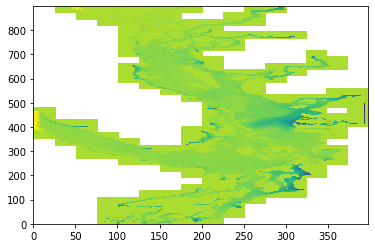

In [12]:
plt.pcolormesh(fD.variables['ATF_NH4'][0,0,:,:])

In [13]:
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*(fD.variables['ATF_NO3'][:,:,:,:]+fD.variables['ATF_NH4']+\
            fD.variables['ATF_PON']+fD.variables['ATF_DON']+fD.variables['ATF_LIV']),3),2),1)

In [14]:
afiltSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NO3'][:,:,:,:],3),2),1)
afiltSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NH4'],3),2),1)
afiltSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_PON'],3),2),1)
afiltSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_DON'],3),2),1)
afiltSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_LIV'],3),2),1)

In [15]:
smsSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_NO3'],3),2),1)
smsSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_NH4'],3),2),1)
smsSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_PON'],3),2),1)
smsSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_DON'],3),2),1)
smsSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_LIV'],3),2),1)

In [16]:
phsSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NO3'],3),2),1)
phsSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NH4'],3),2),1)
phsSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_PON'],3),2),1)
phsSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_DON'],3),2),1)
phsSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_LIV'],3),2),1)

In [17]:
np.shape(e1t)

(1, 1, 898, 398)

In [18]:
bfxSumPON=np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*fD.variables['BFX_PON'],2),1)
bfxSumDIAT=np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*fD.variables['BFX_DIAT'],2),1)

In [19]:
smsSumNO3

array([-54728.4  ,  38132.61 ,   8384.626,  88495.03 ,  86569.56 ],
      dtype=float32)

In [20]:
smsSumNH4

array([-61444.93 , -44684.137, -45283.65 , -27375.383, -27860.346],
      dtype=float32)

In [21]:
smsSumPON

array([45246.613, 44320.555, 36311.938, 30084.125, 18383.379],
      dtype=float32)

In [22]:
smsSumDON

array([21762.365 , 20782.48  , 12866.484 ,  6731.1475, -4790.342 ],
      dtype=float32)

In [23]:
afiltSumNO3

masked_array(data=[-6076.4345703125, 4237.60205078125, 912.9373168945312,
                   9823.5634765625, 9600.791015625],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [24]:
afiltSumNH4

array([-6828.209 , -4966.024 , -5033.8936, -3044.025 , -3098.8071],
      dtype=float32)

In [25]:
afiltSumPON

array([ 1852.1914,  1680.223 ,   785.0077,   155.2135, -1048.5823],
      dtype=float32)

In [26]:
afiltSumDON

array([2417.8108 , 2308.545  , 1428.8553 ,  746.62164, -533.1206 ],
      dtype=float32)

In [27]:
afiltSumLiv

array([  5197.329 ,  -6778.6685,  -1614.2021, -11120.799 ,  -8236.855 ],
      dtype=float32)

In [28]:
nitrSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['REM_NO3'][:,:,:,:],3),2),1)

In [29]:
PPNO3Sum=-1*np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['PRD_NO3'][:,:,:,:]),3),2),1)
PPNH4Sum=-1*np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PRD_NH4'][:,:,:,:],3),2),1)

In [30]:
REFRNSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['REFRN'][:,:,:,:]),3),2),1)

In [31]:
remSum=-1*np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['REM_DON'][:,:,:,:]+fP.variables['REM_PON'][:,:,:,:]),3),2),1)

In [32]:
rivSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['RIV_NO3'][:,:,:,:]+fP.variables['RIV_NH4'][:,:,:,:]),3),2),1)

In [33]:
rivSumNO3=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['RIV_NO3'][:,:,:,:]),3),2),1)

In [34]:
rivSumNH4=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['RIV_NH4'][:,:,:,:]),3),2),1)

In [39]:
fS=nc.Dataset(idir+'SalishSea_1d_20150101_20150105_snp_T_20150101-20150105.nc')

In [40]:
checkall(fS)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'NO3_E3TSNAP', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP'])
Min/Max:
NO3_E3TSNAP : 0.0 1030.6329
unknown shape:  time_instant 1
unknown shape:  time_instant_bounds 2
NH4_E3TSNAP : 0.0 25.325794
PON_E3TSNAP : 0.0 2.8652344
DON_E3TSNAP : 0.0 5.211696
LIV_E3TSNAP : 0.0 14.963388


In [41]:
fS.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'NO3_E3TSNAP', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP'])

In [42]:
no3Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
nh4Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NH4_E3TSNAP'][:,:,:,:],3),2),1)
ponSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['PON_E3TSNAP'][:,:,:,:],3),2),1)
donSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['DON_E3TSNAP'][:,:,:,:],3),2),1)
livSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['LIV_E3TSNAP'][:,:,:,:],3),2),1)

In [43]:
no3Sum

masked_array(data=[37602827928119.03, 37675963416335.44,
                   37684360750381.125, 37717024445915.234,
                   37701455313473.16],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [44]:
livSum

masked_array(data=[400327998901.666, 395344712902.99927,
                   392545994228.6831, 380266281579.1942,
                   368487545264.2529],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [45]:
no3diff=(no3Sum[1:]-no3Sum[:-1])/(24*3600)
nh4diff=(nh4Sum[1:]-nh4Sum[:-1])/(24*3600)
pondiff=(ponSum[1:]-ponSum[:-1])/(24*3600)
dondiff=(donSum[1:]-donSum[:-1])/(24*3600)
livdiff=(livSum[1:]-livSum[:-1])/(24*3600)

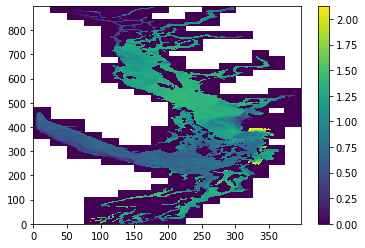

In [46]:
plt.pcolormesh(fS.variables['LIV_E3TSNAP'][0,0,:,:])
plt.colorbar()

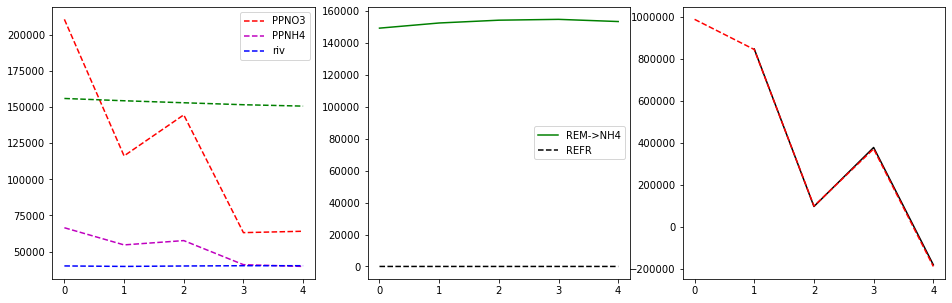

In [47]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
#ax[0].plot(range(0,5),afiltSum,'k-',label='afilt')
ax[0].plot(range(0,5),PPNO3Sum,'r--',label='PPNO3')
ax[0].plot(range(0,5),PPNH4Sum,'m--',label='PPNH4')
ax[0].plot(range(0,5),rivSum,'b--',label='riv')
ax[0].legend()
ax[1].plot(range(0,5),remSum,'g-',label='REM->NH4')
ax[1].plot(range(0,5),REFRNSum,'k--',label='REFR')
ax[0].plot(range(0,5),nitrSum,'g--',label='nitr')
#ax[1].plot(range(0,5),afiltSum,'y--',label='afilt')
#ax[1].plot(range(0,5),nitrSum-PPSum,'m--',label='bio')
#ax[1].plot(range(0,5),physSum+nitrSum-PPSum+rivSum,'c--',label='phys+bio+riv')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[2].plot(range(1,5),no3diff,'k-',label='NO3 diff')
ax[2].plot(range(0,5),phsSumNO3+smsSumNO3,'r--',label='NO3 sms+phys')
#ax[2].plot(range(1,5),livdiff,'k-',label='liv diff')
#ax[2].plot(range(0,5),phsSumLiv+smsSumLiv,'r--',label='liv sms+phys')
#ax[2].legend()

Text(0.5, 1.0, 'DON')

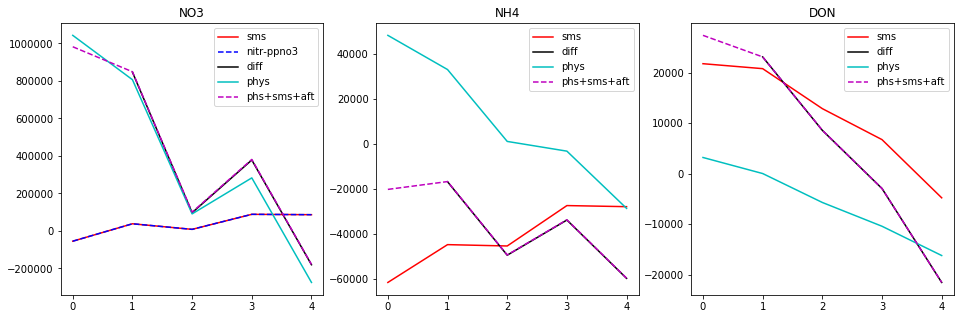

In [48]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(0,5),smsSumNO3,'r-',label='sms')
ax[0].plot(range(0,5),nitrSum-PPNO3Sum,'b--',label='nitr-ppno3')
ax[0].plot(range(1,5),no3diff,'k-',label='diff')
ax[0].plot(range(0,5),phsSumNO3,'c-',label='phys')
ax[0].plot(range(0,5),phsSumNO3+smsSumNO3+afiltSumNO3,'m--',label='phs+sms+aft')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(0,5),smsSumNH4,'r-',label='sms')
ax[1].plot(range(1,5),nh4diff,'k-',label='diff')
ax[1].plot(range(0,5),phsSumNH4,'c-',label='phys')
ax[1].plot(range(0,5),phsSumNH4+smsSumNH4+afiltSumNH4,'m--',label='phs+sms+aft')
ax[1].legend()
ax[1].set_title('NH4')
ax[2].plot(range(0,5),smsSumDON,'r-',label='sms')
ax[2].plot(range(1,5),dondiff,'k-',label='diff')
ax[2].plot(range(0,5),phsSumDON,'c-',label='phys')
ax[2].plot(range(0,5),phsSumDON+smsSumDON+afiltSumDON,'m--',label='phs+sms+aft')
ax[2].legend()
ax[2].set_title('DON')

In [49]:
bfxSumPON

masked_array(data=[-28570.82126631, -29189.37722155, -29238.62348085,
                   -28678.16495153, -27810.32927725],
             mask=False,
       fill_value=1e+20)

In [50]:
afiltSumPON

array([ 1852.1914,  1680.223 ,   785.0077,   155.2135, -1048.5823],
      dtype=float32)

Text(0.5, 1.0, 'Liv')

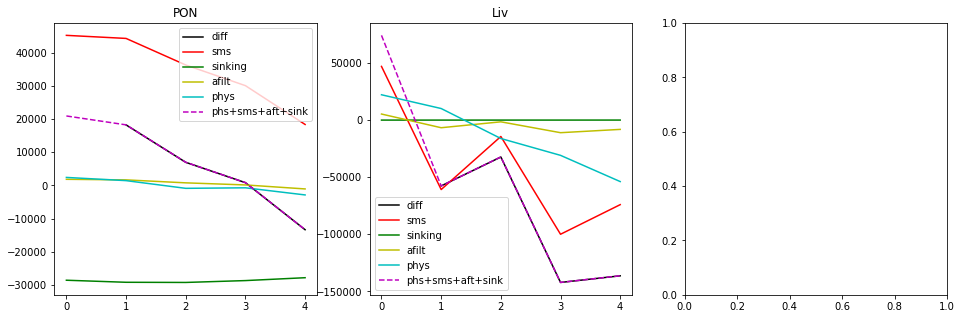

In [51]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),pondiff,'k-',label='diff')
ax[0].plot(range(0,5),smsSumPON,'r-',label='sms')
ax[0].plot(range(0,5),bfxSumPON,'g-',label='sinking')
ax[0].plot(range(0,5),afiltSumPON,'y-',label='afilt')
ax[0].plot(range(0,5),phsSumPON,'c-',label='phys')
ax[0].plot(range(0,5),phsSumPON+smsSumPON+afiltSumPON+bfxSumPON,'m--',label='phs+sms+aft+sink')
ax[0].legend()
ax[0].set_title('PON')
ax[1].plot(range(1,5),livdiff,'k-',label='diff')
ax[1].plot(range(0,5),smsSumLiv,'r-',label='sms')
ax[1].plot(range(0,5),bfxSumDIAT,'g-',label='sinking')
ax[1].plot(range(0,5),afiltSumLiv,'y-',label='afilt')
ax[1].plot(range(0,5),phsSumLiv,'c-',label='phys')
ax[1].plot(range(0,5),phsSumLiv+smsSumLiv+afiltSumLiv+bfxSumDIAT,'m--',label='phs+sms+aft+sink')
ax[1].legend()
ax[1].set_title('Liv')

In [52]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    checkallSlice(f)
    malUA=np.sum(np.sum(f.variables['ATX_NO3'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['DTX_NO3'][:,:,:,0],2),1)
    malUANH4=np.sum(np.sum(f.variables['ATX_NH4'][:,:,:,0],2),1)
    malUDNH4=np.sum(np.sum(f.variables['DTX_NH4'][:,:,:,0],2),1)
    malUADON=np.sum(np.sum(f.variables['ATX_DON'][:,:,:,0],2),1)
    malUDDON=np.sum(np.sum(f.variables['DTX_DON'][:,:,:,0],2),1)
    malUAPON=np.sum(np.sum(f.variables['ATX_PON'][:,:,:,0],2),1)
    malUDPON=np.sum(np.sum(f.variables['DTX_PON'][:,:,:,0],2),1)
    malUALIV=np.sum(np.sum(f.variables['ATX_LIV'][:,:,:,0],2),1)
    malUDLIV=np.sum(np.sum(f.variables['DTX_LIV'][:,:,:,0],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthu', 'depthu_bounds', 'ATX_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATX_NH4', 'ATX_PON', 'ATX_DON', 'ATX_LIV', 'DTX_NO3', 'DTX_NH4', 'DTX_PON', 'DTX_DON', 'DTX_LIV'])
Min/Max:
ATX_NO3 : -22959.494 12455.735
ATX_NH4 : -570.81946 294.25095
ATX_PON : -32.92523 20.015598
ATX_DON : -24.034033 121.55364
ATX_LIV : -101.5893 321.45602
DTX_NO3 : -7.6176634 7.5859747
DTX_NH4 : -0.20001474 0.21867204
DTX_PON : -0.078451015 0.11373839
DTX_DON : -0.06106342 0.16050725
DTX_LIV : -0.19015877 0.43405268


In [53]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    checkallSlice(f)
    print(f.variables.keys())
    harVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    harVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    harVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    harVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    harVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    harVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    harVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    harVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    harVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthv', 'depthv_bounds', 'ATY_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -26651.893 87943.76
ATY_NH4 : -830.3845 2688.6492
ATY_PON : -62.09427 218.59488
ATY_DON : -110.81184 334.93478
ATY_LIV : -583.1179 1781.962
DTY_NO3 : -2.3309636 2.806532
DTY_NH4 : -0.3834385 0.38422355
DTY_PON : -0.01913094 0.00844114
DTY_DON : -0.08104561 0.07913234
DTY_LIV : -0.2353633 0.32716516
dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthv', 'depthv_bounds', 'ATY_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])


In [54]:
harVANH4

masked_array(data=[33552.027 , 27066.988 ,  8624.422 , 11398.643 ,
                   -5867.1797],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [55]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    checkallSlice(f)
    sjcVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    sjcVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    sjcVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    sjcVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    sjcVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    sjcVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    sjcVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    sjcVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    sjcVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthv', 'depthv_bounds', 'ATY_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -50363.895 36537.54
ATY_NH4 : -1846.3625 1288.0266
ATY_PON : -145.37709 96.46846
ATY_DON : -294.38437 204.35536
ATY_LIV : -1330.894 940.3593
DTY_NO3 : -3.3371289 0.0
DTY_NH4 : -0.4354789 3.4830155e-05
DTY_PON : -0.043976154 0.0039210827
DTY_DON : -0.10503821 0.00028190366
DTY_LIV : -0.27016094 0.019293554


In [56]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    checkallSlice(f)
    rosVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    rosVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    rosVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    rosVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    rosVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    rosVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    rosVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    rosVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    rosVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthv', 'depthv_bounds', 'ATY_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -26755.129 5477.6304
ATY_NH4 : -1005.3895 211.134
ATY_PON : -88.277084 22.860434
ATY_DON : -170.31993 32.837017
ATY_LIV : -716.03455 134.79767
DTY_NO3 : -1.5951416 0.75304306
DTY_NH4 : -0.04622512 0.033630334
DTY_PON : -0.005265981 0.070456274
DTY_DON : -0.043553486 0.052230205
DTY_LIV : -0.14447212 0.0759289


In [57]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    checkallSlice(f)
    sutVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    sutVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    sutVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    sutVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    sutVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    sutVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    sutVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    sutVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    sutVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthv', 'depthv_bounds', 'ATY_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -33070.44 9411.868
ATY_NH4 : -675.7954 237.03337
ATY_PON : -26.333675 15.617148
ATY_DON : -24.368048 25.556995
ATY_LIV : -142.32301 90.79756
DTY_NO3 : -1.5385263 1.0906698
DTY_NH4 : -0.09448455 0.27858764
DTY_PON : -0.09813099 0.04511378
DTY_DON : -0.038693067 0.077686176
DTY_LIV : -0.13780639 0.23413207


In [58]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    checkallSlice(f)
    disVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    disVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    disVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    disVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    disVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    disVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    disVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    disVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    disVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthv', 'depthv_bounds', 'ATY_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -27586.166 23857.182
ATY_NH4 : -856.7376 679.8504
ATY_PON : -38.117657 33.82351
ATY_DON : -109.06858 71.322365
ATY_LIV : -610.89856 379.47638
DTY_NO3 : -0.23632649 4.819886
DTY_NH4 : -0.04306279 0.018741928
DTY_PON : -0.00093711115 0.005617146
DTY_DON : -0.08910142 0.010545579
DTY_LIV : -0.4574571 0.042709522


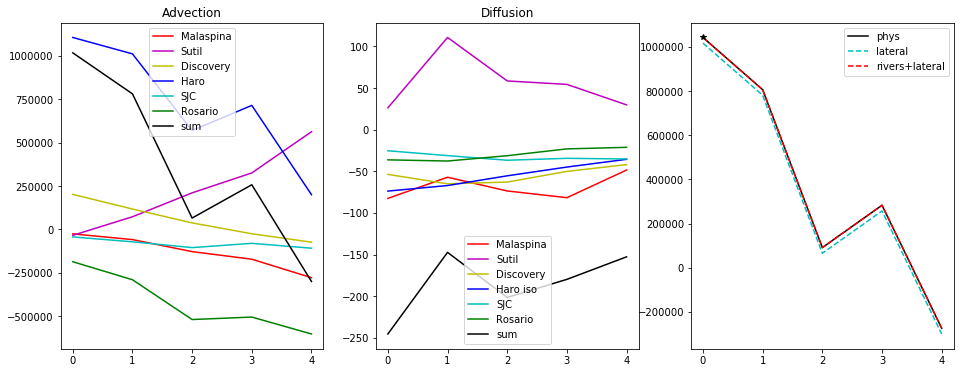

In [59]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumNO3,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSumNO3,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSumNO3[0],'k*')
ax[2].legend()

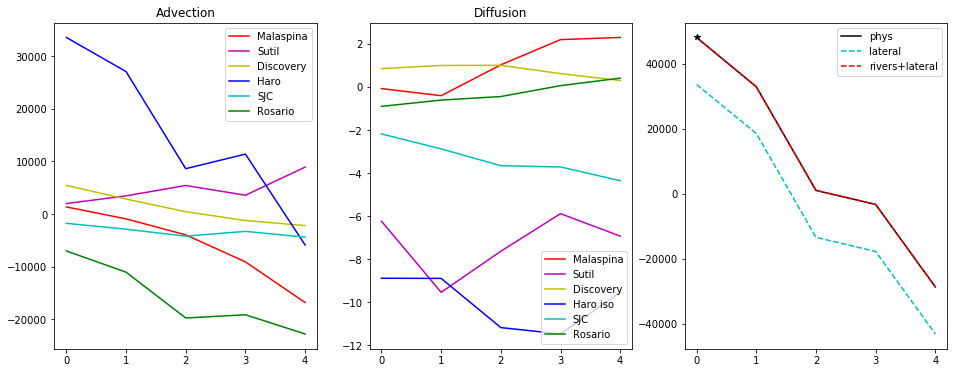

In [60]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUANH4,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVANH4,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVANH4,'y-',label='Discovery')
ax[0].plot(range(0,5),harVANH4,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVANH4,'c-',label='SJC')
ax[0].plot(range(0,5),rosVANH4,'g-',label='Rosario')
adv=harVANH4+sjcVANH4+rosVANH4-disVANH4-sutVANH4-malUANH4
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDNH4,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDNH4,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDNH4,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDNH4,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDNH4,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDNH4,'g-',label='Rosario')
dif=harVDNH4+sjcVDNH4+rosVDNH4-disVDNH4-sutVDNH4-malUDNH4
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumNH4,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSumNH4,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSumNH4[0],'k*')
ax[2].legend()

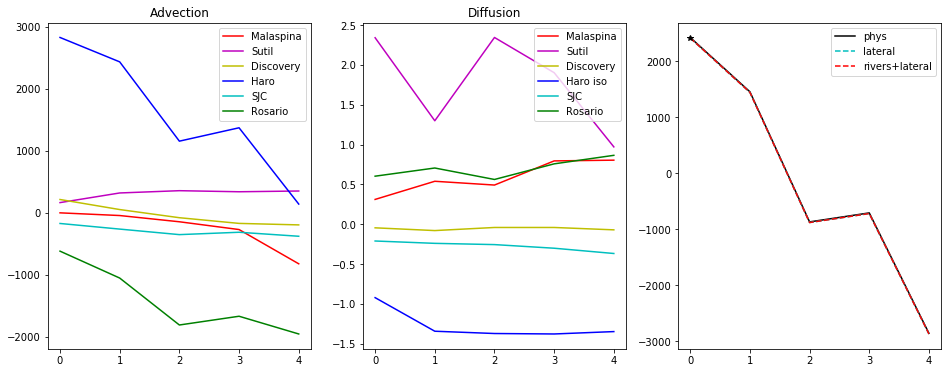

In [61]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUAPON,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVAPON,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVAPON,'y-',label='Discovery')
ax[0].plot(range(0,5),harVAPON,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVAPON,'c-',label='SJC')
ax[0].plot(range(0,5),rosVAPON,'g-',label='Rosario')
adv=harVAPON+sjcVAPON+rosVAPON-disVAPON-sutVAPON-malUAPON
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDPON,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDPON,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDPON,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDPON,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDPON,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDPON,'g-',label='Rosario')
dif=harVDPON+sjcVDPON+rosVDPON-disVDPON-sutVDPON-malUDPON
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumPON,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0],'k*')
ax[2].legend()

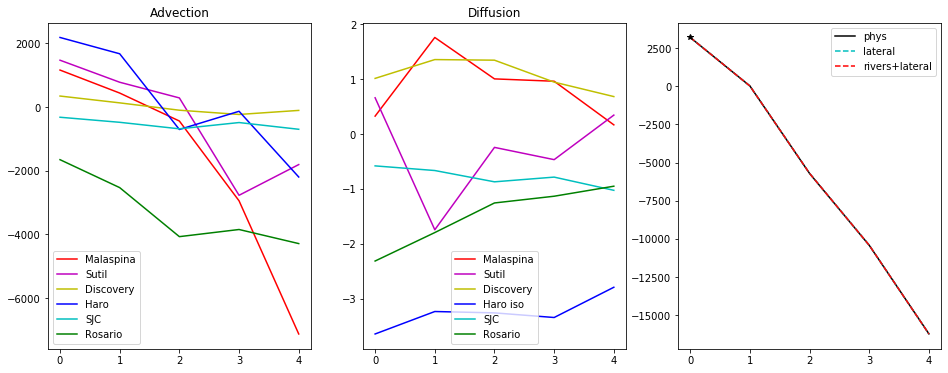

In [62]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUADON,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVADON,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVADON,'y-',label='Discovery')
ax[0].plot(range(0,5),harVADON,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVADON,'c-',label='SJC')
ax[0].plot(range(0,5),rosVADON,'g-',label='Rosario')
adv=harVADON+sjcVADON+rosVADON-disVADON-sutVADON-malUADON
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDDON,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDDON,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDDON,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDDON,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDDON,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDDON,'g-',label='Rosario')
dif=harVDDON+sjcVDDON+rosVDDON-disVDDON-sutVDDON-malUDDON
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumDON,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0],'k*')
ax[2].legend()

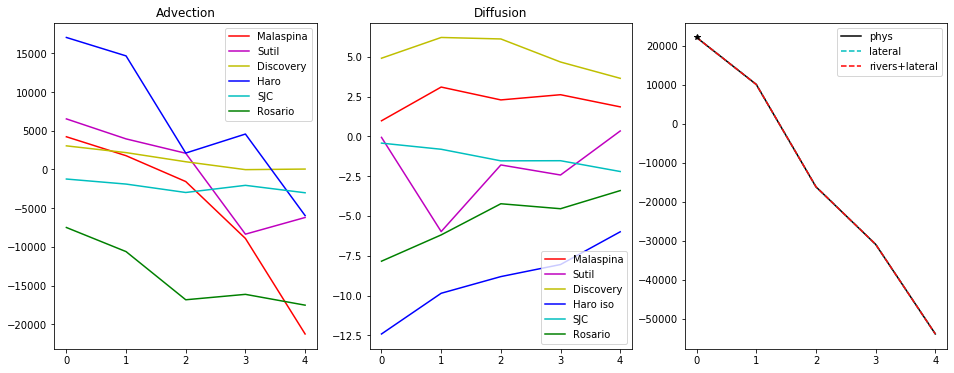

In [63]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUALIV,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVALIV,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVALIV,'y-',label='Discovery')
ax[0].plot(range(0,5),harVALIV,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVALIV,'c-',label='SJC')
ax[0].plot(range(0,5),rosVALIV,'g-',label='Rosario')
adv=harVALIV+sjcVALIV+rosVALIV-disVALIV-sutVALIV-malUALIV
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDLIV,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDLIV,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDLIV,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDLIV,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDLIV,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDLIV,'g-',label='Rosario')
dif=harVDLIV+sjcVDLIV+rosVDLIV-disVDLIV-sutVDLIV-malUDLIV
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumLiv,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0],'k*')
ax[2].legend()

In [64]:
fW=nc.Dataset(idir+'SalishSea_1d_20150101_20150105_layer6m_W_20150101-20150105.nc')
fW2=nc.Dataset(idir+'SalishSea_1d_20150101_20150105_layer6m_W_2_20150101-20150105.nc')

In [65]:
checkallSlice(fW)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'layer6m_W', 'layer6m_W_bounds', 'VMIXNO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'VMIXNH4', 'VMIXPON', 'VMIXDON', 'VMIXLIV', 'ATZ_NO3', 'ATZ_NH4', 'ATZ_PON', 'ATZ_DON', 'ATZ_LIV'])
Min/Max:
VMIXNO3 : -0.008581453 0.028448597
VMIXNH4 : -0.0007196975 0.02175475
VMIXPON : -2.4399207e-05 0.0015045349
VMIXDON : -0.009202332 1.666959e-05
VMIXLIV : -0.0020418072 6.945397e-05
ATZ_NO3 : -28668.404 51787.23
ATZ_NH4 : -2780.77 1975.2516
ATZ_PON : -58.620277 98.40752
ATZ_DON : -156.28317 277.86462
ATZ_LIV : -567.2444 949.1381


In [66]:
checkallSlice(fW2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'layer6m_W', 'layer6m_W_bounds', 'WLDFNO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'WLDFNH4', 'WLDFPON', 'WLDFDON', 'WLDFLIV', 'BSZ_DIAT', 'BSZ_PON', 'VMIXNO3H'])
Min/Max:
WLDFNO3 : -0.049553182 0.076478556
WLDFNH4 : -0.42242348 0.28980362
WLDFPON : -0.050612528 0.06607068
WLDFDON : -0.4014568 0.18778019
WLDFLIV : -0.4993443 0.33314064
BSZ_DIAT : -1.5233719e-06 0.0
BSZ_PON : -1.3660542e-05 0.0
VMIXNO3H : -2.0068331e-08 1.9486695e-08


In [68]:
fr=nc.Dataset(idir+'SalishSea_1d_20150101_20150105_rad_T_20150101-20150105.nc')

In [69]:
checkallSlice(fr)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'RDB_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RDB_NH4', 'RDB_DON', 'RDB_PON', 'RDB_LIV', 'RDN_NO3', 'RDN_NH4', 'RDN_DON', 'RDN_PON', 'RDN_LIV'])
Min/Max:
RDB_NO3 : 0.0 0.0
RDB_NH4 : 0.0 0.0
RDB_DON : 0.0 0.0
RDB_PON : 0.0 0.0
RDB_LIV : 0.0 0.0017354337
RDN_NO3 : 0.0 0.0
RDN_NH4 : 0.0 0.0
RDN_DON : 0.0 0.0
RDN_PON : 0.0 0.0
RDN_LIV : 0.0 0.017799463


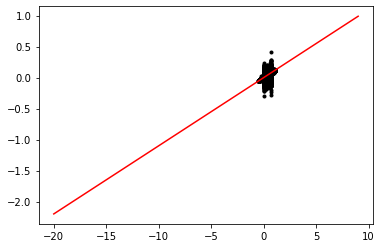

In [70]:
plt.plot(np.ma.masked_where(tmask==0,fD2.variables['SMS_NO3'][-1,:,:,:]).flatten(),np.ma.masked_where(tmask==0,fD.variables['ATF_NO3'][-1,:,:,:]).flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

(650, 775)

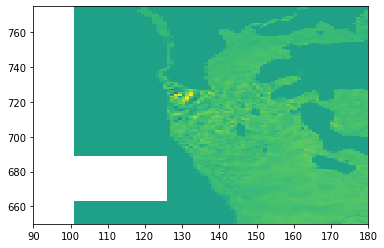

In [73]:
plt.pcolormesh(fD.variables['ATF_NO3'][-1,24,:,:])
plt.xlim(90,180)
plt.ylim(650,775)

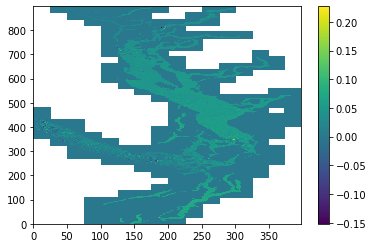

In [75]:
plt.pcolormesh(fD.variables['ATF_NO3'][-3,24,:,:])
plt.colorbar()

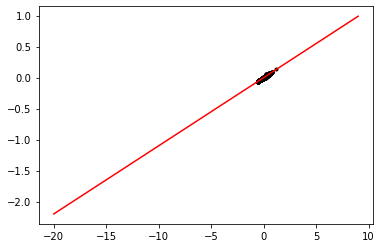

In [76]:
plt.plot(fD2.variables['SMS_NH4'][-1,:,:,:].flatten(),fD.variables['ATF_NH4'][-1,:,:,:].flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

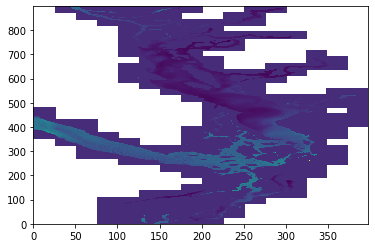

In [77]:
plt.pcolormesh(fD.variables['ATF_NH4'][-1,24,:,:])

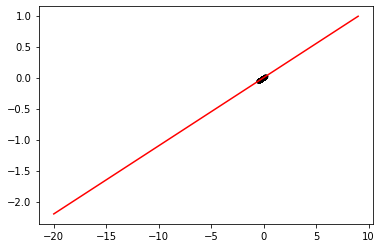

In [79]:
plt.plot(fD2.variables['SMS_DON'][-1,:,:,:].flatten(),fD.variables['ATF_DON'][-1,:,:,:].flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')